# Imports and define expectation func

In [1]:
from pathlib import Path
import os
cwd_path = Path.cwd(); set_path = str(cwd_path.parent.parent); os.chdir(set_path)

In [2]:
import torch
import matplotlib.pyplot as plt
import matplotlib as mpl
from FittedModels.utils import plot_distributions, plot_samples, plot_sampling_info, plot_divergences
torch.manual_seed(5)
from ImportanceSampling.VanillaImportanceSampler import VanillaImportanceSampling
from FittedModels.utils import plot_distributions
from FittedModels.train import LearntDistributionManager
from Utils import plot_func2D, MC_estimate_true_expectation, plot_distribution, expectation_function
from FittedModels.Models.FlowModel import FlowModel
from FittedModels.utils import plot_history
import matplotlib.pyplot as plt
from TargetDistributions.MoG import MoG, custom_MoG

In [3]:
#mpl.rcParams['figure.dpi'] = 100

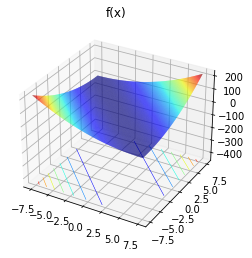

In [4]:
expectation_func_fig = plot_func2D(expectation_function, n_points=200, range=15)

# Easy MoG

## Setup

tensor(4.5998)

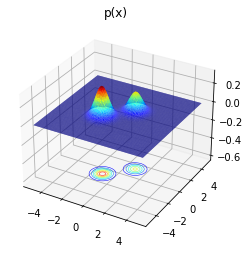

In [5]:
torch.manual_seed(6)
epochs = 500
dim = 2
n_samples_estimation = int(1e4)
#target = MoG(dim=dim, n_mixes=2, min_cov=0.01, loc_scaling=0.8)
target = custom_MoG(dim=dim, cov_scaling=0.3)
fig = plot_distribution(target, bounds=[[-5, 5], [-5, 5]])
true_expectation = MC_estimate_true_expectation(target, expectation_function, int(1e6))
true_expectation

## DReG

### Let's train for a bit

In [6]:
torch.manual_seed(0)
learnt_sampler = FlowModel(x_dim=dim , n_flow_steps=3) #, flow_type="RealNVP")
tester = LearntDistributionManager(target, learnt_sampler, VanillaImportanceSampling, loss_type="DReG", k=None)
expectation_before, info_before = tester.estimate_expectation(n_samples_estimation, expectation_function)

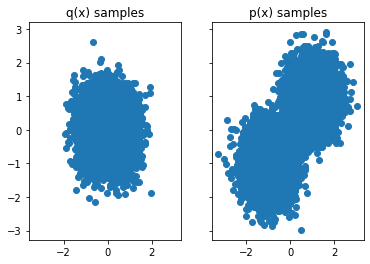

In [7]:
samples_before = plot_samples(tester, n_samples=int(1e4))

In [8]:
history = tester.train(1000, batch_size=int(1e3))

loss: -0.6208207011222839, mean log p_x -2.3937792778015137: 100%|█████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:56<00:00, 17.59it/s]


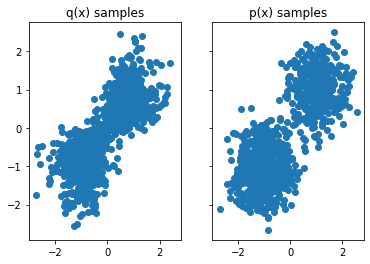

In [9]:
samples_fig_after = plot_samples(tester)

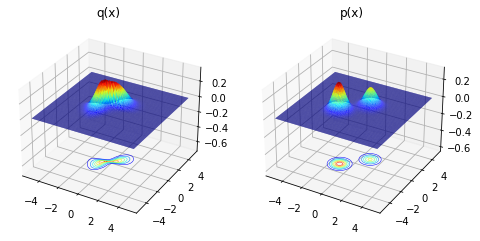

In [10]:
fig_after_train = plot_distributions(tester, bounds=[[-5, 5], [-5, 5]])

In [11]:
expectation, info = tester.estimate_expectation(n_samples_estimation, expectation_function)

print(f"True expectation estimate is {true_expectation} \n"
    f"estimate before training is {expectation_before} \n"
      f"estimate after training is {expectation} \n" 
     f"effective sample size before is {info_before['effective_sample_size']} out of {n_samples_estimation}\n"
     f"effective sample size after train is {info['effective_sample_size']}  out of {n_samples_estimation}\n"
     f"variance in weights is {torch.var(info['normalised_sampling_weights'])}")

True expectation estimate is 4.599788188934326 
estimate before training is 5.453876972198486 
estimate after training is 4.669642925262451 
effective sample size before is 43.48492431640625 out of 10000
effective sample size after train is 6898.7978515625  out of 10000
variance in weights is 4.495730898668171e-09


(<Figure size 432x720 with 9 Axes>,
 array([<AxesSubplot:title={'center':'loss'}>,
        <AxesSubplot:title={'center':'log_p_x'}>,
        <AxesSubplot:title={'center':'log_q_x'}>,
        <AxesSubplot:title={'center':'kl'}>,
        <AxesSubplot:title={'center':'alpha_2_divergence'}>,
        <AxesSubplot:title={'center':'importance_weights_var'}>,
        <AxesSubplot:title={'center':'normalised_importance_weights_var'}>,
        <AxesSubplot:title={'center':'effective_sample_size'}>,
        <AxesSubplot:title={'center':'alpha_2_divergence_over_p'}>],
       dtype=object))

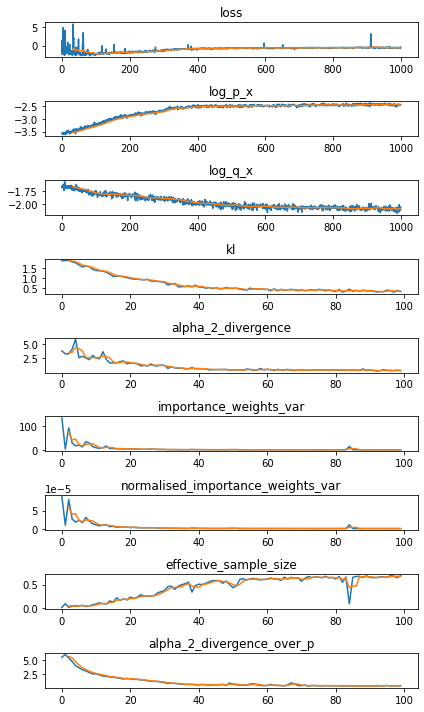

In [12]:
plot_history(history)

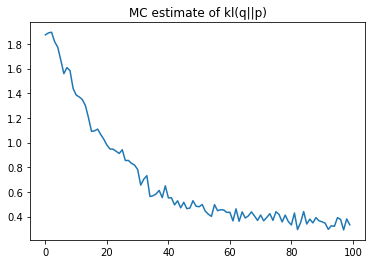

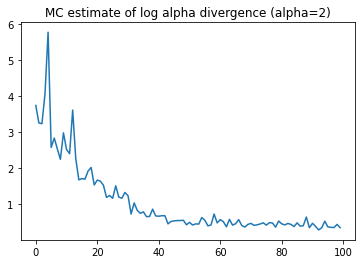

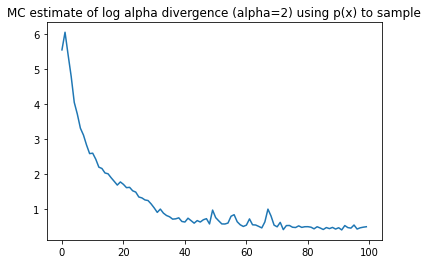

In [13]:
plot_divergences(history)

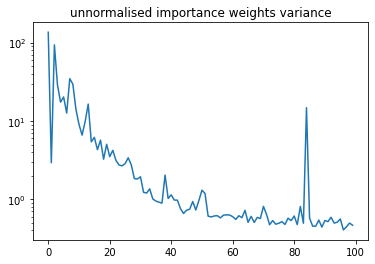

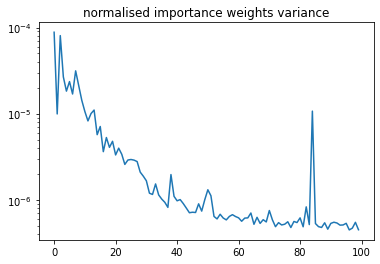

In [14]:
plot_sampling_info(history)

## kl

In [22]:
torch.manual_seed(0) # 0
learnt_sampler = FlowModel(x_dim=dim , n_flow_steps=3) #, flow_type="RealNVP")
tester = LearntDistributionManager(target, learnt_sampler, VanillaImportanceSampling, loss_type="kl") 
expectation_before, sampling_weights_before = tester.estimate_expectation(n_samples_estimation, expectation_function)

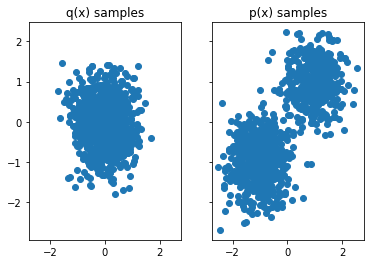

In [23]:
samples_before = plot_samples(tester)

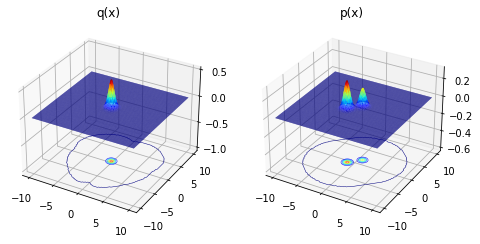

In [24]:
fig_before_train = plot_distributions(tester)

In [25]:
history = tester.train(5000, batch_size=int(1e3)) # epochs 1000

loss: 0.43067246675491333, mean log p_x -2.4020657539367676: 100%|█████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 56.06it/s]


In [26]:
expectation, info = tester.estimate_expectation(n_samples_estimation, expectation_function)

print(f"True expectation estimate is {true_expectation} \n"
    f"estimate before training is {expectation_before} \n"
      f"estimate after training is {expectation} \n" 
     f"effective sample size before is {info_before['effective_sample_size']} out of {n_samples_estimation}\n"
     f"effective sample size after train is {info['effective_sample_size']}  out of {n_samples_estimation}\n"
     f"variance in weights is {torch.var(info['normalised_sampling_weights'])}")

True expectation estimate is 4.599788188934326 
estimate before training is 5.453876972198486 
estimate after training is 4.586287498474121 
effective sample size before is 43.48492431640625 out of 10000
effective sample size after train is 2965.50439453125  out of 10000
variance in weights is 2.3723444542156358e-08


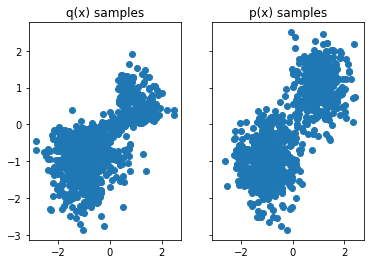

In [27]:
samples_after = plot_samples(tester)

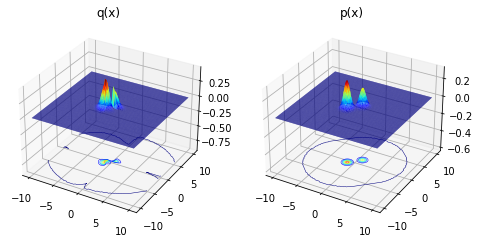

In [28]:
fig_after_train = plot_distributions(tester)

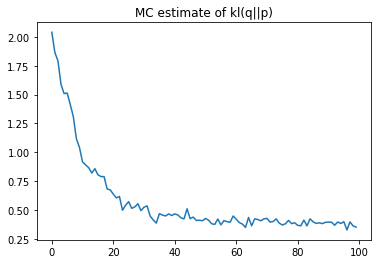

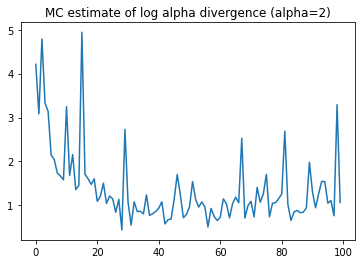

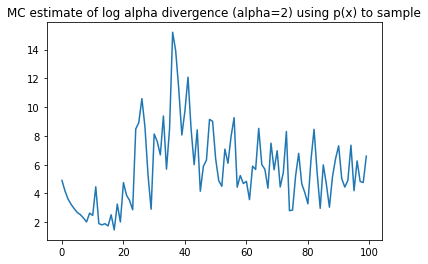

In [29]:
plot_divergences(history)

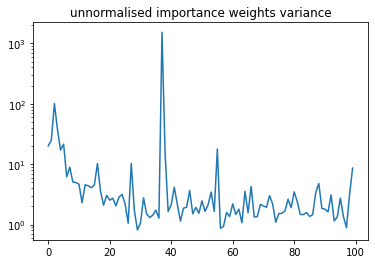

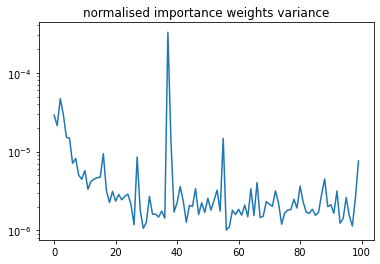

In [30]:
plot_sampling_info(history)

(<Figure size 432x720 with 9 Axes>,
 array([<AxesSubplot:title={'center':'loss'}>,
        <AxesSubplot:title={'center':'log_p_x'}>,
        <AxesSubplot:title={'center':'log_q_x'}>,
        <AxesSubplot:title={'center':'kl'}>,
        <AxesSubplot:title={'center':'alpha_2_divergence'}>,
        <AxesSubplot:title={'center':'importance_weights_var'}>,
        <AxesSubplot:title={'center':'normalised_importance_weights_var'}>,
        <AxesSubplot:title={'center':'effective_sample_size'}>,
        <AxesSubplot:title={'center':'alpha_2_divergence_over_p'}>],
       dtype=object))

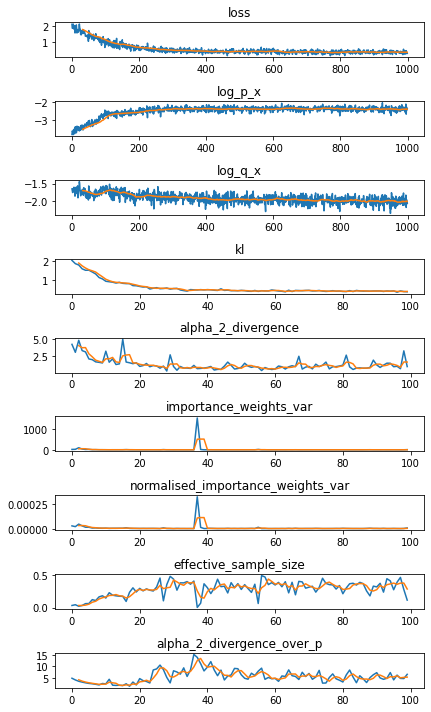

In [31]:
plot_history(history)

## DReG with alpha = 0.05

In [32]:
torch.manual_seed(0) # 1 we get a pathological case
learnt_sampler = FlowModel(x_dim=dim , n_flow_steps=5) #  , flow_type="RealNVP"
tester = LearntDistributionManager(target, learnt_sampler, VanillaImportanceSampling, loss_type="DReG", alpha=0.05) # "kl"

In [33]:
expectation_before, info_before = tester.estimate_expectation(n_samples_estimation, expectation_function)

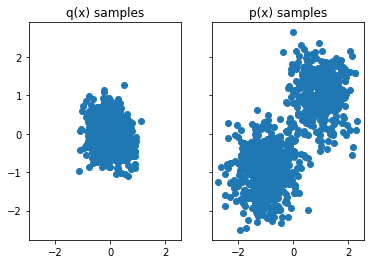

In [34]:
samples_before = plot_samples(tester)

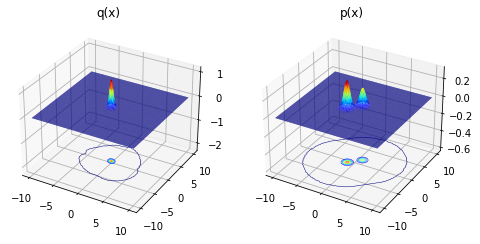

In [35]:
fig_before_train = plot_distributions(tester)

In [36]:
history = tester.train(10000, batch_size=100)

loss: 0.030488772317767143, mean log p_x -2.441490411758423: 100%|███████████████████████████████████████████████████████████████████████████████| 10000/10000 [08:21<00:00, 19.96it/s]


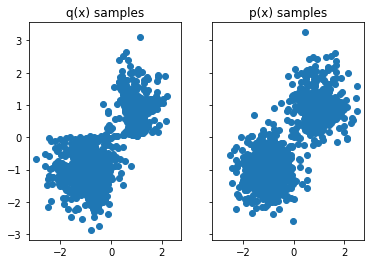

In [37]:
samples_fig_after = plot_samples(tester)

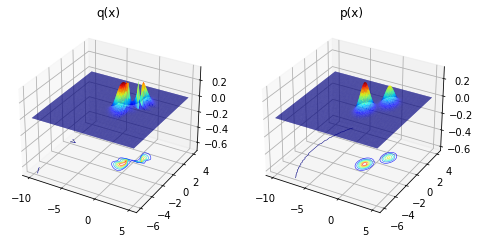

In [38]:
fig_after_train = plot_distributions(tester, bounds=[[-10, 5], [-6, 4]])

In [39]:
expectation, info = tester.estimate_expectation(n_samples_estimation, expectation_function)

print(f"True expectation estimate is {true_expectation} \n"
    f"estimate before training is {expectation_before} \n"
      f"estimate after training is {expectation} \n" 
     f"effective sample size before is {info_before['effective_sample_size']} out of {n_samples_estimation}\n"
     f"effective sample size after train is {info['effective_sample_size']}  out of {n_samples_estimation}\n"
     f"variance in weights is {torch.var(info['normalised_sampling_weights'])}")

True expectation estimate is 4.599788188934326 
estimate before training is 3.3877944946289062 
estimate after training is 4.552788257598877 
effective sample size before is 4.3599982261657715 out of 10000
effective sample size after train is 4904.78662109375  out of 10000
variance in weights is 1.0389287652401435e-08


(<Figure size 432x720 with 9 Axes>,
 array([<AxesSubplot:title={'center':'loss'}>,
        <AxesSubplot:title={'center':'log_p_x'}>,
        <AxesSubplot:title={'center':'log_q_x'}>,
        <AxesSubplot:title={'center':'kl'}>,
        <AxesSubplot:title={'center':'alpha_2_divergence'}>,
        <AxesSubplot:title={'center':'importance_weights_var'}>,
        <AxesSubplot:title={'center':'normalised_importance_weights_var'}>,
        <AxesSubplot:title={'center':'effective_sample_size'}>,
        <AxesSubplot:title={'center':'alpha_2_divergence_over_p'}>],
       dtype=object))

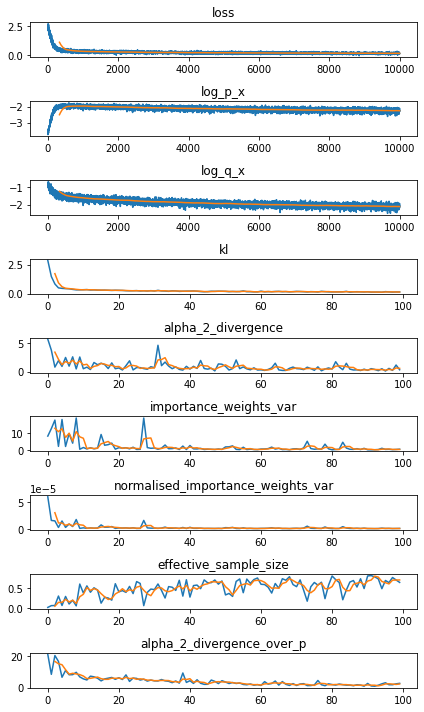

In [40]:
plot_history(history)

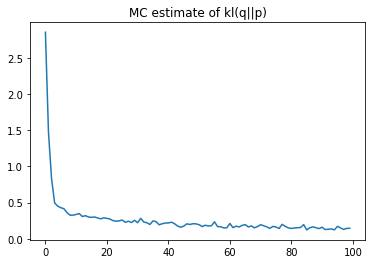

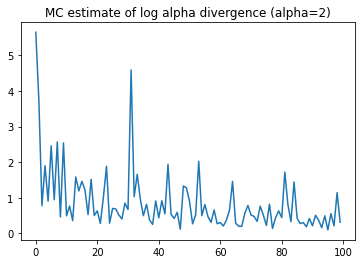

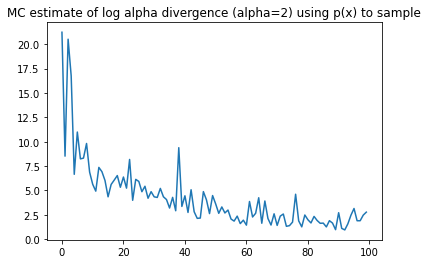

In [41]:
plot_divergences(history)

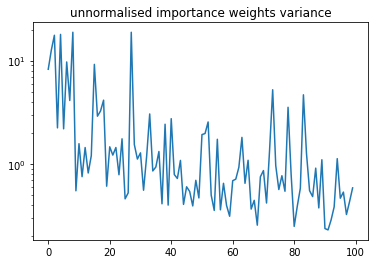

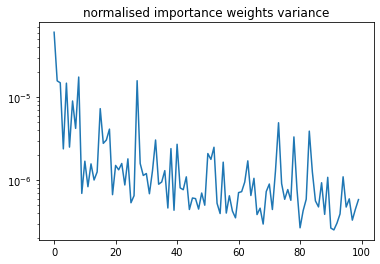

In [42]:
plot_sampling_info(history)

# Steep Difficult MoG

## Setup

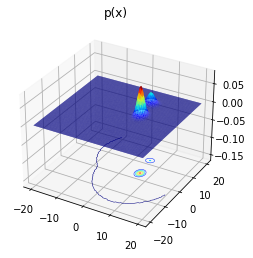

In [43]:
torch.manual_seed(1)
epochs = 500
dim = 2
n_samples_estimation = int(1e4)
target = MoG(dim=dim, n_mixes=2, min_cov=1, loc_scaling=10)
fig = plot_distribution(target, bounds=[[-20, 20], [-20, 20]])

## DReG

In [73]:
torch.manual_seed(1) 
learnt_sampler = FlowModel(x_dim=dim , n_flow_steps=3, scaling_factor=5) #, flow_type="RealNVP"
tester = LearntDistributionManager(target, learnt_sampler, VanillaImportanceSampling, loss_type="DReG")#, alpha=0.05) # "kl"

In [74]:
expectation_before, info_before = tester.estimate_expectation(n_samples_estimation, expectation_function)

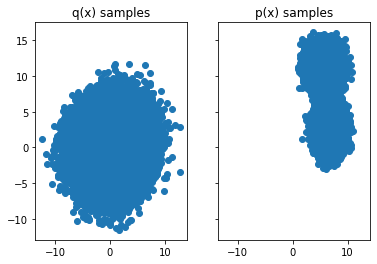

In [75]:
samples_before = plot_samples(tester, n_samples=int(1e5))

In [76]:
# we have to clip grad, otherwise is unstable
history = tester.train(10000, batch_size=int(1e3), clip_grad=True, max_grad_norm=2)

loss: -0.5519561171531677, mean log p_x -4.486208438873291: 100%|████████████████████████████████████████████████████████████████████████████████| 10000/10000 [10:59<00:00, 15.16it/s]


In [77]:
expectation, info = tester.estimate_expectation(n_samples_estimation, expectation_function)
print(f"True expectation estimate is {true_expectation} \n"
    f"estimate before training is {expectation_before} \n"
      f"estimate after training is {expectation} \n" 
     f"effective sample size before is {info_before['effective_sample_size']} out of {n_samples_estimation}\n"
     f"effective sample size after train is {info['effective_sample_size']}  out of {n_samples_estimation}\n"
     f"variance in weights is {torch.var(info['normalised_sampling_weights'])}")

True expectation estimate is 4.599788188934326 
estimate before training is 95.39286041259766 
estimate after training is 151.1892852783203 
effective sample size before is 128.14483642578125 out of 10000
effective sample size after train is 7971.60498046875  out of 10000
variance in weights is 2.5447828289060226e-09


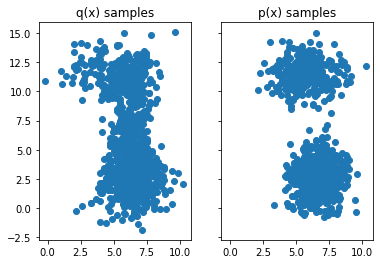

In [78]:
samples_fig_after = plot_samples(tester)

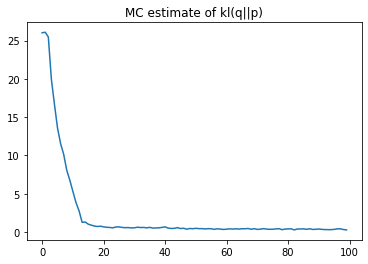

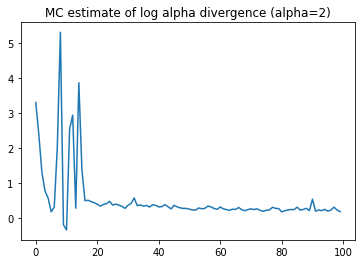

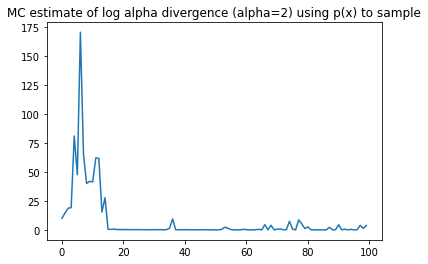

In [79]:
plot_divergences(history)

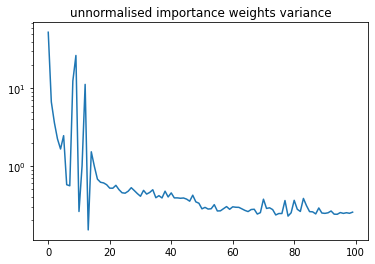

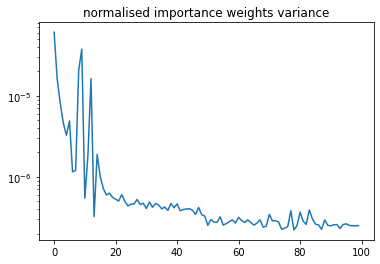

In [80]:
plot_sampling_info(history)

(<Figure size 432x720 with 9 Axes>,
 array([<AxesSubplot:title={'center':'loss'}>,
        <AxesSubplot:title={'center':'log_p_x'}>,
        <AxesSubplot:title={'center':'log_q_x'}>,
        <AxesSubplot:title={'center':'kl'}>,
        <AxesSubplot:title={'center':'alpha_2_divergence'}>,
        <AxesSubplot:title={'center':'importance_weights_var'}>,
        <AxesSubplot:title={'center':'normalised_importance_weights_var'}>,
        <AxesSubplot:title={'center':'effective_sample_size'}>,
        <AxesSubplot:title={'center':'alpha_2_divergence_over_p'}>],
       dtype=object))

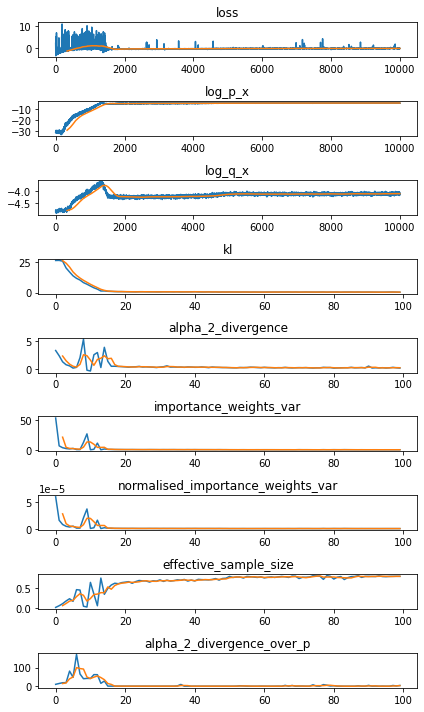

In [81]:
plot_history(history)

## kl

In [82]:
torch.manual_seed(1) # 0
learnt_sampler = FlowModel(x_dim=dim , n_flow_steps=3, scaling_factor=5) # , flow_type="RealNVP"
tester = LearntDistributionManager(target, learnt_sampler, VanillaImportanceSampling, loss_type="kl") 
expectation_before, sampling_weights_before = tester.estimate_expectation(n_samples_estimation, expectation_function)

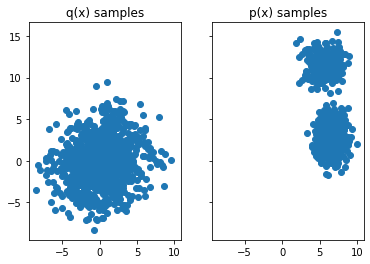

In [83]:
samples_before = plot_samples(tester)

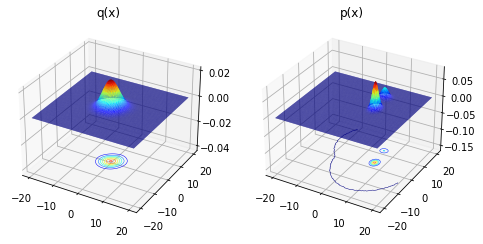

In [84]:
fig_before_train = plot_distributions(tester, bounds=[[-20, 20], [-20, 20]])

In [85]:
history = tester.train(10000, batch_size=int(1e3)) # epochs 1000

loss: 0.3714055120944977, mean log p_x -3.5884268283843994: 100%|████████████████████████████████████████████████████████████████████████████████| 10000/10000 [04:42<00:00, 35.42it/s]


In [86]:
expectation, info = tester.estimate_expectation(n_samples_estimation, expectation_function)

print(f"True expectation estimate is {true_expectation} \n"
    f"estimate before training is {expectation_before} \n"
      f"estimate after training is {expectation} \n" 
     f"effective sample size before is {info_before['effective_sample_size']} out of {n_samples_estimation}\n"
     f"effective sample size after train is {info['effective_sample_size']}  out of {n_samples_estimation}\n"
     f"variance in weights is {torch.var(info['normalised_sampling_weights'])}")

True expectation estimate is 4.599788188934326 
estimate before training is 95.39286041259766 
estimate after training is 91.40828704833984 
effective sample size before is 128.14483642578125 out of 10000
effective sample size after train is 2456.016357421875  out of 10000
variance in weights is 3.0719412791313516e-08


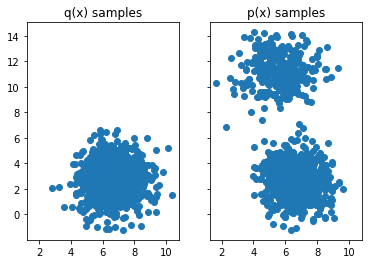

In [87]:
samples_after = plot_samples(tester)

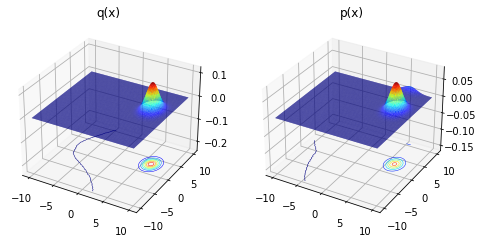

In [88]:
fig_after_train = plot_distributions(tester, )

(<Figure size 432x720 with 9 Axes>,
 array([<AxesSubplot:title={'center':'loss'}>,
        <AxesSubplot:title={'center':'log_p_x'}>,
        <AxesSubplot:title={'center':'log_q_x'}>,
        <AxesSubplot:title={'center':'kl'}>,
        <AxesSubplot:title={'center':'alpha_2_divergence'}>,
        <AxesSubplot:title={'center':'importance_weights_var'}>,
        <AxesSubplot:title={'center':'normalised_importance_weights_var'}>,
        <AxesSubplot:title={'center':'effective_sample_size'}>,
        <AxesSubplot:title={'center':'alpha_2_divergence_over_p'}>],
       dtype=object))

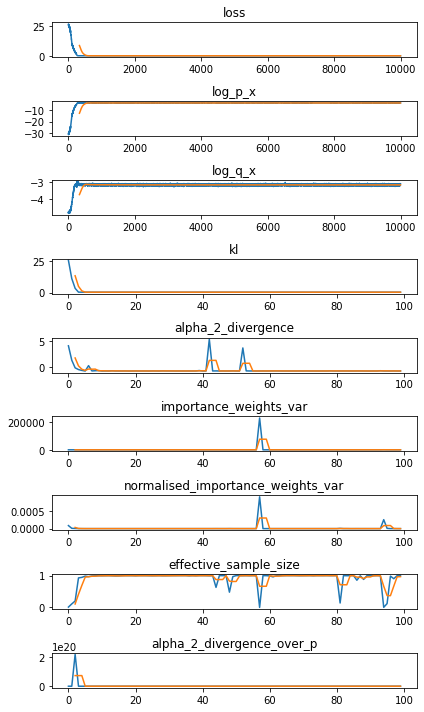

In [89]:
plot_history(history)

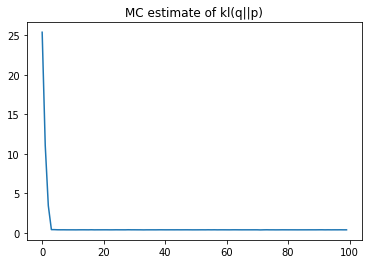

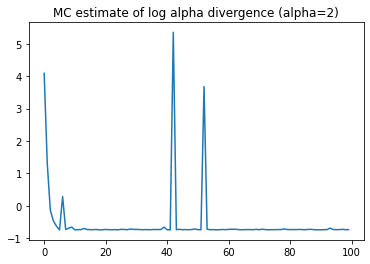

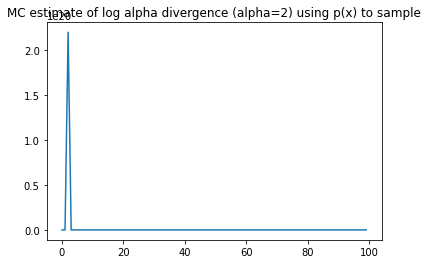

In [90]:
plot_divergences(history)

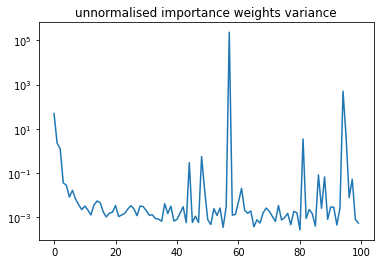

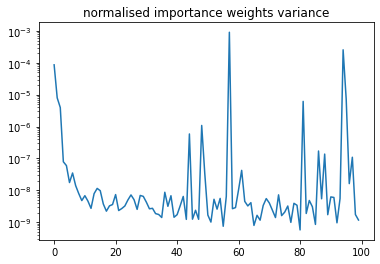

In [91]:
plot_sampling_info(history)

# New Section